# Tutorial for FHDpy

Credits: Henrique Ennes (https://hlovisiennes.github.io/).

In [1]:
import FHDpy.FHD as FHD
from FHDpy.SLP import SLP as SLP

This notebook deals with the data structure for Heegaard diagrams described in [arxiv preprint](https://arxiv.org/abs/2507.11406). We strongly advise the reader to first check `TutorialSLP.ipynb`, as many methods of that module will be implicitly or explicitly used here.

 In a snipshot, a Heegaard diagram consists of a tuple $(\Sigma_g, \alpha, \beta)$ where $\Sigma_g$ is the (unique up to homeomorphism) closed surface of genus $g$ and $\alpha$ and $\beta$ are two curves in this surface. In terms of data structure, we assume that

1. $\Sigma_g$ is given by a 2-complex $T$.
2. $\alpha$ are $g$ curves in the edges of $T^{(1)}$ which may only intersect at vertices. We call the $\alpha$ curves edged (as they lie in the edges of the complex).
3. $\beta$ are $g$ SLPs describing the signed intersection sequences with each of the eges of $T$. We call the $\beta$ curves edged (as they lie in the edges of the complex).

For example, we show below what a Heegaard diagram in the usual decomposition of the torus looks like.

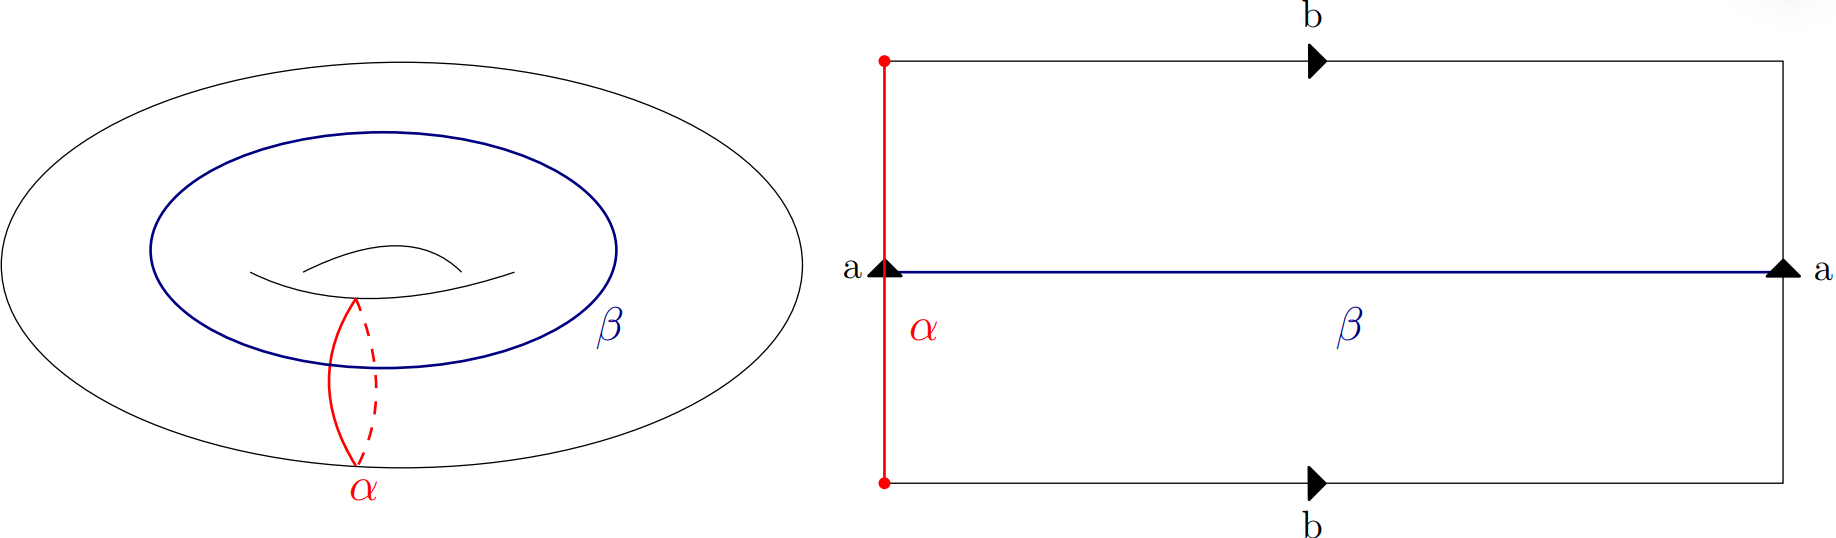

Obs: The edges a and b shold not be confused with the $\alpha$ and $\beta$ curves: although in this case a coincides with $\alpha$, $\beta$ does not lie over $b$.


In FHD, we can represent this same diagram in two ways:

1. Using the FHDLong syntax, which allows one to express the cellular complex for $\Sigma_g=T^2$. This syntax assumes four mandatory arguments and one optional. The mandatory are:
    
    a. The $\alpha$ curves in standard form, that is, slightly displaced from the edges of the complex. In the preprint, this 

In [2]:
import importlib

importlib.reload(FHD)

alpha_curves_standard = {'a': SLP(['b*'])}
alpha_curves_edges = {'a': ['a']}
generators_standard = {'a': SLP(['b']), 'b': SLP(['a*'])}
generators_edge = {'a':['a'], 'b':['b']}
beta = [SLP(['a'])]

# This creates the diagram itself.
fhd_compressed = FHD.FHDLong(alpha_curves_standard, alpha_curves_edges, generators_standard, generators_edge, beta = beta)

We can check that this, indeed, represents a sphere by computing its fundamental group (which, by the Poincaré conjecture, proved by Perelman, is the only 3-manifold with trivial fundamental group). 

In [10]:
print('Generators: ', list(fhd_compressed.alpha.keys()))
print('Relators: ', fhd_compressed.fundamental_group()[0].get_uncompressed().list_form)

Generators:  ['a']
Relators:  ['a']
